# AUTHOR : CHIOMA OBIOHA

# TASK 2: Predictive Analysis with Unsupervised ML Algorithm

# Data Science and Business Analytics Intern
# GRIP @ The Sparks Foundation

The purpose is to find the optimum number of clusters in the Iris Dataset

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans

# Load the dataset

In [4]:
Dataset = pd.read_csv('iris dataset.csv')
Dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
Dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
Dataset.shape

(150, 6)

In [9]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
Dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
(2) # Finding the optimum number of clusters for K-means Classification
    # Performing the Kmeans clustering analysis on the dataset

In [11]:
x = Dataset.iloc [:, [0,1,2,3]].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


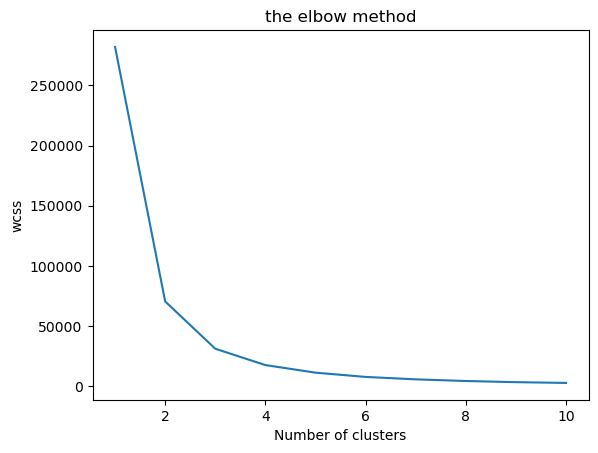

In [12]:
#plotting the results onto a line graph,
# allowing us to observe :the elbow:

plt.plot(range(1,11), wcss)
plt.title("the elbow method")
plt.xlabel('Number of clusters')
plt.ylabel("wcss") #within cluster sum of squares
plt.show()

In [ ]:
#you can clearly see why it is called "the elbow method" from the above
#graph the optimum clusters is where the elbow occurs. This is when the within
#cluster sum of squares (wcss) doesn't decrease signficantly with every
#iteration

In [13]:
# Applying kmeans to the datset/creating the kmeans classifier
kmeans = KMeans (n_clusters = 3, init = 'k-means++',
                 max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

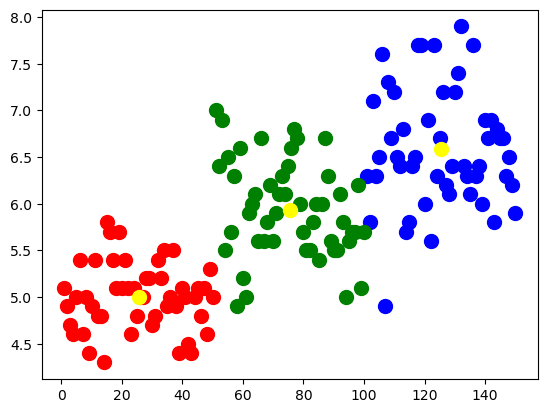

In [37]:
#visualizing the clusters - on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'iris-virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()

# Thank you